## Homework 10

#### *DATA 1010*

In [1]:
using Pkg; Pkg.activate(".")

Activating environment at `~/Google Drive/DSI/Masters Program/DATA 1010/DATA1010-2019/problem-sets/hw10/Project.toml`


In [2]:
using Random, LinearAlgebra, Statistics, TSne
using Distributions, Plots, LaTeXStrings
gr(fontfamily = "Palatino");

---

## Problem 1



Consider the XOR classification problem. We have to find a decision boundary separating points labelled in blue and red, shown below:

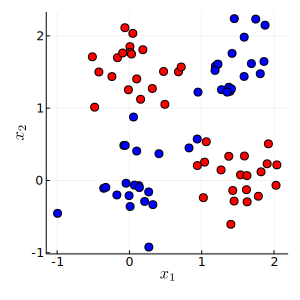

In [3]:
Random.seed!(123)

blue_points = [
    rand(MvNormal([1.5; 1.5], [[0.1 0.0]; [0.0 0.1]]), 20)';
    rand(MvNormal([0.0; 0.0], [[0.1 0.0]; [0.0 0.1]]), 20)'
]

red_points = [
    rand(MvNormal([1.5; 0.0], [[0.1 0.0]; [0.0 0.1]]), 20)';
    rand(MvNormal([0.0; 1.5], [[0.1 0.0]; [0.0 0.1]]), 20)'
]

plot(xlabel=L"x_1", ylabel=L"x_2", legend = false, ratio = 1, size = (300, 300))
scatter!(blue_points[:,1], blue_points[:,2], color=:blue)
scatter!(red_points[:,1], red_points[:,2], color=:red)

(a) For each of the following models, determine whether the model is an appropriate choice for solving the XOR classification problem: LDA, QDA, Naive Bayes, Linear SVM, Kernelized SVM, Logistic Regression, Decision Tree. Provide a brief justification for your answer. 

(b) Explore different architectures on [Tensorflow Playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.40593&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) to find the smallest neural network that can accurately classify these points. Write down the weights and biases of each hidden layer as a matrix. Draw a diagram illustrating the architecture you selected and write an expression for the function ($x_1$ and $x_2$) that computes the output of the final layer. 



*Solution*. 
a). 

LDA is not appropriate. Any linear decision boundary will perform quite poorly, yet LDA produces a linear separation boundary.

QDA is not appropriate in the sense that class conditional densities aren't remotely multivariate Gaussian, though interestingly it would actually produce very good precictions. That's because the fitted Gaussians are going to form a pair of crossing ellipses (like an x), and each of these densities will be larger than the other in pretty much exactly the correct two quadrants.

Naive Bayes is not appropriate, since the features are not independent conditioning on $y$.

Linear SVM is not appropriate since the decision boundary is not linear.

Kernelized SVM might be appropriate since its decision boundary is non-linear. Either a quadratic or RBF kernel might give good results.

Logistic regression is not appropriate since it has linear decision boundary.

Decision tree is appropriate because the data is well-segmeneted into squares. However, it might have difficulty training, since the *initial* cuts it would need to make actually do have high Gini impurities. 

--- 

## Problem 2

In this exercise we explore the connection between SVM and single-layer perceptron model.

Suppose we have a training dataset D of size $N$: $$ D = \{(\mathbf{x}_1, y_1), (\mathbf{x}_2, y_2), \cdots (\mathbf{x}_N, y_N)\}, $$ where $\mathbf{x}_i \in \mathbb{R}^n$, $y_i \in \{+1, -1\}$. Suppose that our points are linearly separable.

Define $\mathbf{w} \in \mathbb{R}^n$ and $b \in \mathbb{R}$. Define $$\Phi(\mathbf{x}, \mathbf{w}, b) = \mathbf{w} \cdot \mathbf{x} + b.$$ 

(a) Find a function $g$ and classification criteria such that $g(\Phi(\mathbf{x}, \mathbf{w}, b))$ and the classification criteria give a logistic regression classifier, an SVM classifier, and a perceptron classifier.

(b) Use the loss functions for perceptron and SVM classifiers to explain why a hard-margin SVM can be viewed as a perceptron with additional penalty terms given a linearly separable classification problem. 

(c) What advantages does the hard-margin SVM have over the single-layer perceptron when it comes to training?


*Solution*. (a) Let $g_1(z) = \frac{1}{1 + e^{-(z)}}$. Let $g_2(z) = \text{sgn}(z)$. Then a logistic regression classifier defines $$ \hat{y}_i = \begin{cases} 1 &&\text{if $g_1(\Phi(\mathbf{x};\mathbf{w}, b)) \geq 0.5$ }  \\  -1 && \text{else.}  \end{cases} $$ 

The SVM and perceptron classifiers share the same classifier

$$ \hat{y}_i = g_2(\Phi(\mathbf{x};\mathbf{w}, b)) = \text{sgn}(\Phi(\mathbf{x};\mathbf{w}, b)).$$

(b) The SVM and single-layer perceptron have a lot in common with respect to their settings, and SVM can often be viewed as an improved SLP when we look at both their loss functions and training steps. Not coincidentally, we may formulate perceptrons in dual forms as well.

Let $D_M$ denote the set of points misclassified.

The loss function for perceptron is its misclassification times the distance from the decision boundary: $$  - \frac{1}{|\mathbf{w}|} \sum_{(\mathbf{x_i, y_i})\in D_M} y_i (\mathbf{w} \cdot \mathbf{x}_i + b).$$ Because scaling $\mathbf{w}$ does not alter the hyperplane at $\mathbf{w} \cdot \mathbf{x}_i + b = 0$, we may omit $\frac{1}{|\mathbf{w}|} $ to have the loss function for a perceptron as $$ L(\mathbf{w}, b) =  -\sum_{(\mathbf{x_i, y_i})\in D_M} y_i (\mathbf{w} \cdot \mathbf{x}_i + b).$$ The goal of training for a perceptron classifier is to minimize this function. In a linearly separable problem, this function can be reduced to zero.

We have shown in-class that we may write the objective function of an SVM classifier as, for all $i = 1, \cdots, N$, $$
\text{min     }\frac 12  \left| \mathbf{w}\right| ^2$$ $$\text{s.t.    } y_i(\mathbf{w} \cdot {\mathbf{x}_i} + b) - 1 \geq 0.$$ Because our data is linearly separable, this constrained optimization may be equivalently written as minimizing the loss $$ L(\mathbf{w}, b)  =  \frac{\lambda}{2} \left| \mathbf{w} \right|+  \sum_{i = 1} ^ N \text{max}(\mid1 - y_i(\mathbf{w} \cdot \mathbf{x}_i + b)\mid, 0)$$ for sufficiently large $\lambda$, a hyperparameter that adjusts how thick we would like the separation margin to be. When $\lambda$ is small, our classifier may underperform in classification accuracy in order to have a thick margin. Note that we may equivalently write this loss as $$ L(\mathbf{w}, b)  =  \frac{\lambda}{2} \left| \mathbf{w} \right|+  \sum_{(\mathbf{x_i, y_i})\in D_M} (1 - (y_i(\mathbf{w} \cdot \mathbf{x}_i) + b)). $$ The summation term includes the loss function for the perceptron classifier. In particular, up to re-scaling $\lambda$, we may even write the above to match the loss for 'the special perceptron' as
$$ L(\mathbf{w}, b)  =  \frac{\lambda}{2} \left| \mathbf{w} \right|+  \sum_{(\mathbf{x_i, y_i})\in D_M} - (y_i(\mathbf{w} \cdot \mathbf{x}_i) + b), $$ since the $1$'s are just constants.

(c) When we reduce loss for our perceptron classifier, so long as all classification are made correctly the loss will be zero regardless of how close the points are to the decision margin, and as a consequence the perceptron does not train towards the hyperplane with the largest margin. More often than not it may land on any of the infinitely many decision boundaries. To train a perceptron often need to use gradient descent whose results depend on a host of parameters and whose eventual fitted hyperplane may not be desirable. 

But we think the hyperplane with the widest margin is the best hyperplane, and an SVM classifier has a closed-form solution for this best hyperplane. This provides another way in which we may think of the SVM as an improved perceptron.

## Problem 3

(a) Consider the coordinates of $n$ points in $\mathbb{R}^p$, organized into an $n\times p$ matrix $A$. Suppose that `U, Σ, V = svd(A .- mean(A, dims=1))`, and explain why `V[:,1:k]'` is the matrix which maps any point in $\mathbb{R}^p$ to its coordinates in the subspace of $\mathbb{R}^p$ spanned by the columns of `V[:,1:k]`. (Note: this one is linear algebra review.)

(b) Plot an image of the *third* principal component for the MNIST dataset. Identify a digit which you think should predominantly have a large or small dot product with this image, and make a scatter plot of which shows the dot product with the first principal component on the $x$-axis and the dot product with the third principal component on the $y$-axis. Check whether your prediction was accurate.

(c) What do you think the 100th principal component might look like, compared to the first few? Display it and check your prediction.


*Solution*. The component of a given vector $\mathbf{x}$ in the direction of the first column of $V$ is obtained by dotting the $\mathbf{x}$ with the first column of $V$. Since $V' \mathbf{x}$ yields the dot product of the vector with each column of $V$ (by the definition of matrix multiplication), the components of $V' \mathbf{x}$ give the coordinates of $\mathbf{x}$ with respect to the columns of $V$. In particular, the projection of $\mathbf{x}$ onto the first $k$ columns of $V$ is equal to the linear combination of those columns with weights given by the components of $V' \mathbf{x}$.

My prediction is that 2's are going to be generally near the middle, since most of them will catch a roughly equal amount of each color. This turns out to be reasonably accurate. 

One might guess that it would be noisier than the first few, with lots of small negative and positive splotches. That prediction is accurate. 

In [4]:
using MLDatasets, Images, Plots, Statistics, LinearAlgebra
#MNIST.download(i_accept_the_terms_of_use = true)
features, labels = MNIST.traindata(Float64);

In [5]:
function imshow(v)
    if any(v .< 0)
        (x -> x > 0 ? RGB(x,0,0) : RGB(0,0,-x)).(reshape(v./maximum(abs.(v)),(28,28))')
    else
        Gray.(reshape(v./maximum(abs.(v)),(28,28))')
    end
end

imshow (generic function with 1 method)

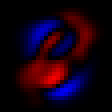

In [6]:
A = reshape(features[1:28*28*3000],28^2,3_000)';
U, S, V = svd(A .- mean(A,dims=1))
imshow(V[:,3])

We expect this image to interact with digits 0 and 8, in the sense that these digits might be most capable of picking up the positive and the negative regions of the plot. The following plot demonstrates this possibility. AS you can see, both zeros and eights are quite consistently positive.

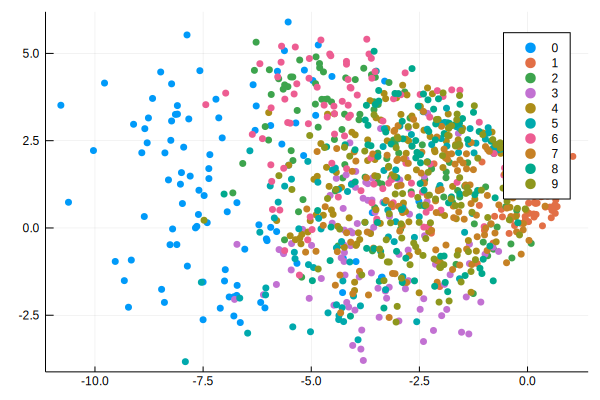

In [7]:
scatter(A[1:1000,:]*V[:,1], A[1:1000,:]*V[:,3], group =
labels[1:1000],markersize = 4,markerstrokewidth=0)

c). As expected, the 100-th component barely separates the data and does provide much useful information at all.

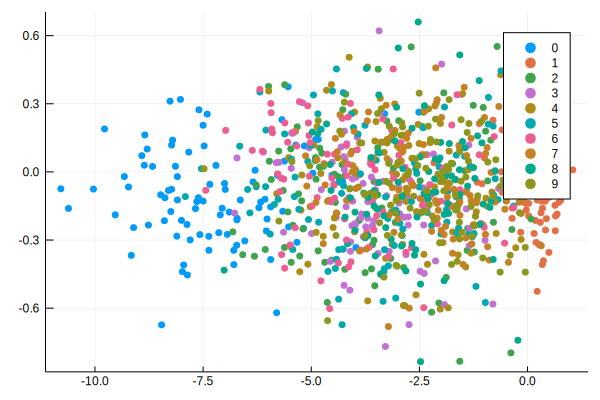

In [8]:
scatter(A[1:1000,:]*V[:,1], A[1:1000,:]*V[:,100], group =
labels[1:1000],markersize = 4,markerstrokewidth=0)

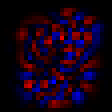

In [9]:
imshow(V[:,100])

## Problem 4

(a) PCA does not take any measures to separate points from different classes. Come up with an example of a two-class dataset in $\mathbb{R}^2$ with the property that the classes are separable in the original space, but they get all mixed up when projected to the first principal component. Please illustrate your example by generating points and making a scatter plot.

(b) What about t-SNE? Use the `TSne` package to reduce your dataset from 2 dimensions to 1, and plot the results to see how it compares to PCA.

*Solution*. 

(a) This happens even for multivariate normal distributed points if the classes separate along the smaller axis of the density-level-set ellipses: 

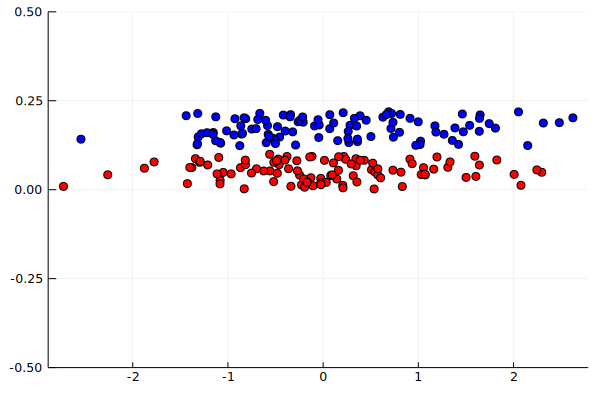

In [10]:
n = 100
redpoints = [randn(n) 0.1rand(n)]
bluepoints = [randn(n) 0.1rand(n) .+ 0.12]
scatter(redpoints[:,1], redpoints[:,2], color = :red, leg = false)
scatter!(bluepoints[:,1], bluepoints[:,2], color = :blue)
plot!(ylims = (-0.5,0.5))

No, t-SNE doesn't do any better:

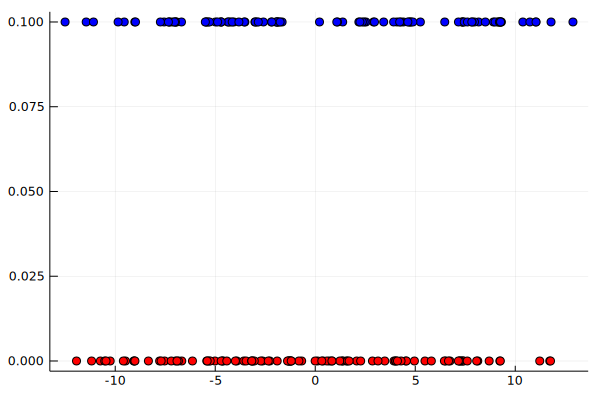

In [11]:
using TSne
image_points = tsne([redpoints; bluepoints], 1)
scatter([(x,0) for x in image_points[1:n]], color = :red, leg = false)
scatter!([(x,0.1) for x in image_points[n+1:end]], color = :blue)

---

## Problem 5

A weather station in Providence classifies each day's weather as "good", "fair", or "poor" according to meteorological data. The following table shows the probabilistic relationship between weather on the current day and the probability of the weather expected on next day conditioned on the type of current day.

current\next | good | fair | poor
------------| -----|-----| ----- 
good | 0.60 | 0.30 | 0.10
fair | 0.50 | 0.25 | 0.25
poor | 0.20 | 0.40 | 0.40

(a) Determine the probability that the weather will be "poor" exactly 3 days after a "good" weather day.

(b) Over a long period of time, what percentage of days can we expect to have "good" weather?

*Solution*. 

(a) This is equal to the first row, third column entry of $P^3$, where $P$ is the transition matrix:

In [12]:
P = [0.6 0.3 0.1
     0.5 0.25 0.25
     0.2 0.4 0.4]
(P^3)[1,3]

0.19675

(b) The stationary distribution of $P$ is the 1-eigenvector of $P'$: 

In [13]:
eigen(copy(P'))

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
eigenvalues:
3-element Array{Float64,1}:
 -0.0886000936329383 
  0.33860009363293836
  0.9999999999999993 
eigenvectors:
3×3 Array{Float64,2}:
  0.49704   -0.772796  -0.795866
 -0.809513   0.158165  -0.500258
  0.312473   0.61463   -0.341085

We see that the weather is good on about 79.5% of the days.

---

## Problem 6

Consider the state space $X = \{0, 1\}^n$ of binary strings having length $n$. Define $p(y, x) = 1/n$ if $y$ differs from $x$ in exactly one bit, and $p(y, x) = 0$ otherwise. 

Suppose we desire an equilibrium distribution $\pi$ for which $\pi(x)$ is proportional to the number of ones that occur in vector $\mathbf{x}$. For example, in the long run, a random walk should visit a string having five 1’s five times as often as it visits a string having only a single 1. 

Provide a general formula for the acceptance ratio $\alpha(x, y)$ that would be used if we were to obtain the desired equilibrium distribution using the Metropolis-Hastings algorithm.

According to Metropolis-Hastings, the acceptance ratio is 1 if the number of 1's increases between the current and proposed state, and $(k-1)/k$ if the number of 1's goes down by 1. 

---

## Problem 7

In this exercise, we will develop a MCMC sampler for linear regression. First, we generate some data, assuming the true regression function:

$$ r(x) = -x + 0.2 $$

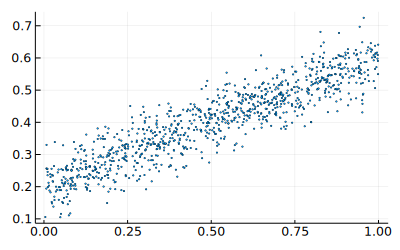

In [14]:
x = rand(Uniform(0, 1), 1000)
y_mean = 0.4x .+ 0.2
y = y_mean + rand(Normal(0, 0.05), 1000)
function observations()
    scatter(x, y, ms = 1, msw = 0.2, size = (400, 250), legend = false)
end
observations()

Use MCMC sampling to fit a linear regression model to predict $y$ given $x$. Use $\mathcal{N}(0, 100)$ prior for the intercept and the slope and $\operatorname{Inv-Gamma}(0.001, 0.001)$ prior for the standard deviation. Generate 10,000 samples for each of the model parameters.

*Solution*. Let's follow the example from class. We just need to modify it by including $\sigma$ in the parameter updates, as well as $m$ and $b$: 

In [15]:
N = Normal(0, 10)
S = InverseGamma(1e-3, 1e-3)
δ(x,y,m,b,σ) = sum((yᵢ - m*xᵢ - b)^2/(2*σ^2) for (xᵢ, yᵢ) in zip(x,y))
function α(x, y, m, b, σ, m_prop, b_prop, σ_prop)
    min(1.0, exp(-δ(x,y,m_prop,b_prop, σ_prop) + δ(x,y,m,b,σ)) * 
        pdf(N, m_prop)/pdf(N, m) * pdf(N, b_prop)/pdf(N, b) * pdf(N, b_prop)/pdf(N, b))
end

α (generic function with 2 methods)

In [16]:
function mcmc(n_iterations)
    m, b, σ = 0.0, 0.0, 1.0
    θs = [(m, b, σ)]
    for i in 1:n_iterations
        m_prop, b_prop, σ_prop = m + rand(Normal(0,0.005)), b + rand(Normal(0,0.005)), σ + rand(Normal(0,0.005))
        if rand() < α(x, y, m, b, σ, m_prop, b_prop, σ_prop)
            m, b = m_prop, b_prop, σ_prop
            push!(θs, (m, b, σ))
        end
    end
    θs
end

mcmc (generic function with 1 method)

In [17]:
θs = mcmc(3_000);

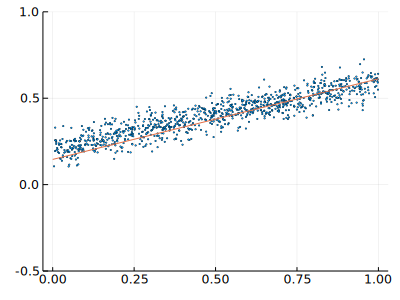

In [18]:
m, b = θs[end]
observations()
plot!(0:1, x-> m*x + b, size = (400, 300), ylims = (-0.5, 1))

---

## Problem 8

For convenience, define the pdf for a normal distribution as
$$f(x; \mu, \eta) = \left( \frac{\eta}{2\pi} \right)^{\frac{1}{2}} \text{exp}\left(  -\frac{1}{2}\eta(x - \mu)^2 \right).$$

In other words, $\eta$ is a place holder for $\frac{1}{\sigma^2}$. We call $\eta$ the **precision** of a normal distribution.

Suppose we have a prior distribution for the unknown mean of a normal distribution $ N(\mu, \eta_0 ^{-1})$. The prior distribution for this mean $f_M(\mu)$ is given by $N(\mu_0, \eta_{p}^{-1})$. In this problem we will show computationally that the posterior mean $\mu_{\text{post}}$ is weighted sum of the sample mean and the prior mean. In the process, we will derive the posterior variance $\eta_{\text{post}}$ and observe its form.

1. Show that the posterior distribution is proportional to the following expression: 

$$ f_{M; X}(\mu; x) \propto \text{exp}\left( -\frac 12 [n\eta_0(\bar{x} - \mu)^2 + \eta_p(\mu - \mu_0^2)] \right).$$

2. Re-arrange terms to format the expression in the form of a normal distribution. You will find the mean and standard deviation of the posterior distribution:

$$ \mu_{\text{post}} = \frac{n\eta_0\bar{x} + \mu_0 \eta_p}{n \eta_0 + \eta_p}$$ and

$$ \eta_{\text{post}} = n\eta_0 + \eta_p$$

3. Re-write the posterior mean as a weighted sum of $\bar{x}$ and $\mu_0$. Explain how these results agree with the observation that posterior parameters are functions of both the data and the prior distribution.

*Hint:* Without proof, you may use the identity: $\sum_{i=1}^n(x_i - \mu)^2 = \sum_{i=1}^n(x_i - \bar{x})^2 + n(\mu - \bar{x})^2$ in your calculations.


*Solution*. The posterior distribution is $f_{M; x}(\mu; x)$, and we have

$$f_{M; x}(\mu; x) \propto f_{X; M}(x; \mu) \times f_M(\mu),$$ and dropping all terms up to a constant with respect to $\mu$ gives
$$\propto \text{exp} \left( -\frac 1 2 [ \eta_0 \sum(x_i - \mu)^2 + \eta_p (\mu - \mu_0)^2 ] \right),$$ and plugging the equality above gives us $$ \propto \text{exp}\left( -\frac 12 [\eta_0 (\sum(x_i - \bar{x})^2 - n(\bar{x} - \mu)^2) + \eta_p(\mu - \mu_0^2)] \right).$$

Because $\sum(x_i - \bar{x})^2$ can be treated as a constant with respect to $\mu$, we drop this term as well, leaving us

$$ \propto \text{exp}\left( -\frac 12 [n\eta_0(\bar{x} - \mu)^2 + \eta_p(\mu - \mu_0^2)] \right).$$ 

Fitting this distribution into the form of normal distribution given in the problem statement gives the result.

Since $\eta_{\text{post}} = n\eta_0 + \eta_p$, we can say that $\eta_{\text{post}}$ is a weighted sum of both the prior and a scaled parameter of the data. 

We may re-write $\mu_{\text{post}}$ as $$ \mu_{\text{post}} = \bar{x} \frac{n \eta_0}{n\eta_0 + \eta_p} + \mu_0 \frac{\eta_p}{n\eta_0 + \eta_p}, $$ showing that the posterior mean is a weighted sum of the prior mean and the sample mean.


